In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import show_images

In [3]:
# 读取图片，记录特征和标签
datas = []
datadir = './image/hog'

# 直接默认就好
hog = cv2.HOGDescriptor()

for fname in os.listdir(f'{datadir}/neg'):
    img = cv2.imread(f'{datadir}/neg/{fname}', -1)
    datas.append((hog.compute(img), -1))

for fname in os.listdir(f'{datadir}/pos'):
    img = cv2.imread(f'{datadir}/pos/{fname}', -1)
    datas.append((hog.compute(img), 1))

In [4]:
# 分类训练集和测试集，训练
import random
random.shuffle(datas)
train_features, train_labels = zip(*datas[:int(len(datas)*0.8)])
test_features, test_labels = zip(*datas[int(len(datas)*0.8):])

train_features, train_labels = np.array(train_features), np.array(train_labels)
test_features, test_labels = np.array(test_features), np.array(test_labels)

# SVM
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setC(0.01)

svm.train(np.array(train_features), cv2.ml.ROW_SAMPLE, np.array(train_labels))

True

Wrong rate: 0.0018148820326678765


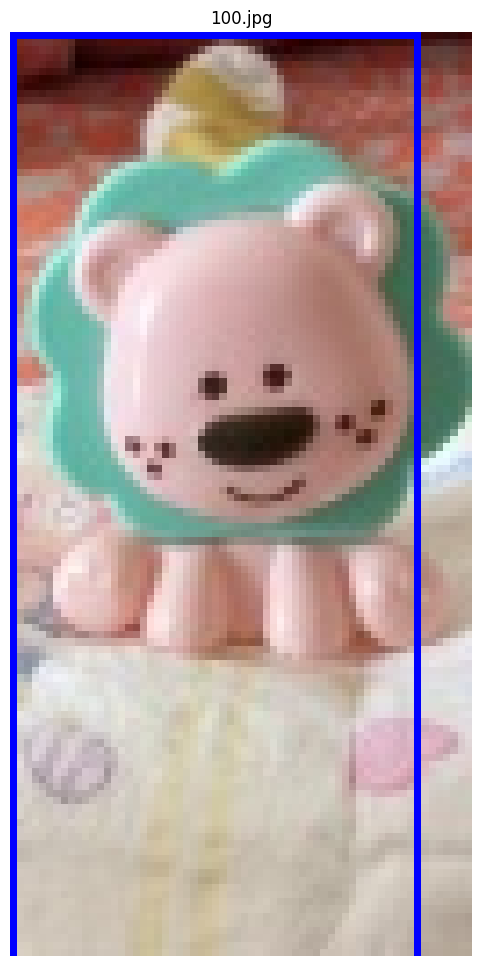

In [5]:
# SVM 检测
predict_labels = svm.predict(np.array(test_features))[1].flatten()
print('Wrong rate:', sum(predict_labels != np.array(test_labels))/len(predict_labels))

# SVM 存和取
# svm.save('svm_model.yml')
# svm = cv2.ml.SVM_load('svm_model.yml')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(svm.getSupportVectors()[0])

# 从训练集图片中读取一张图片进行检测
img = cv2.imread(f'{datadir}/pos/100.jpg', -1)
(rects, weights) = hog.detectMultiScale(img, padding=(8, 8), scale=1.05)
x, y, w, h = rects[np.argmax(weights.flatten())]
cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 1)
show_images([
    ('100.jpg', img)
])